In [1]:
import f3dasm
import numpy as np
import matplotlib.pyplot as plt

2023-03-10 16:51:44.810898: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-10 16:51:44.978710: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-10 16:51:45.648307: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.1/lib64:/usr/local/cuda-11.1/lib64
2023-03-10 16:51:45.648376: W ten

### Set some constants

In [2]:
DIMENSIONALITY = 1
SEED = 42
BOUNDS = np.tile([-3.4,8.0], (DIMENSIONALITY,1))
FUNCTION_CLASS = f3dasm.functions.Levy
NOISE = 0.3
N = 200
design = f3dasm.make_nd_continuous_design(bounds=BOUNDS, dimensionality=DIMENSIONALITY)

Create the ground truth function from the `f3dasm.functions` submodule:

In [3]:
f_ground_truth = FUNCTION_CLASS(dimensionality=DIMENSIONALITY,scale_bounds=BOUNDS,offset=False)

Create a linspace between the boundaries for plotting the ground truth function later:

In [4]:
X = np.linspace(BOUNDS[0,0],BOUNDS[0,1], num=200).reshape(-1,DIMENSIONALITY)
y = f_ground_truth(X)

Create the `LearningData` class of benchmark function data:

In [5]:
d = f3dasm.data.benchmarkfunction_data.BenchmarkFunctionData(n=N, dimensionality=DIMENSIONALITY, bounds=BOUNDS, 
            function_class=FUNCTION_CLASS, noise=NOISE, seed=SEED)

Extract the data (samples and labels) from the object

In [6]:
X_samples = d.get_input_data()
y_samples = d.get_labels()

Plotting ground truth and samples

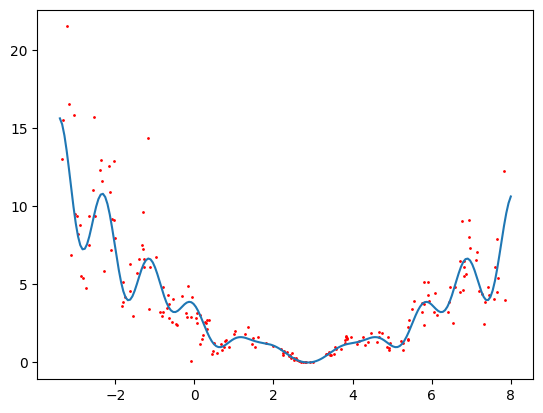

In [8]:
plt.scatter(X_samples,y_samples,s=1,c='r')
plt.plot(X,y)

To improve: The relative value of the noise is now the standard way of creating noise. This is dependent on the absolute value of the objective function. Maybe this is not so good default behaviour.